In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ms = pd.read_csv('microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [7]:
#Daily log returns
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

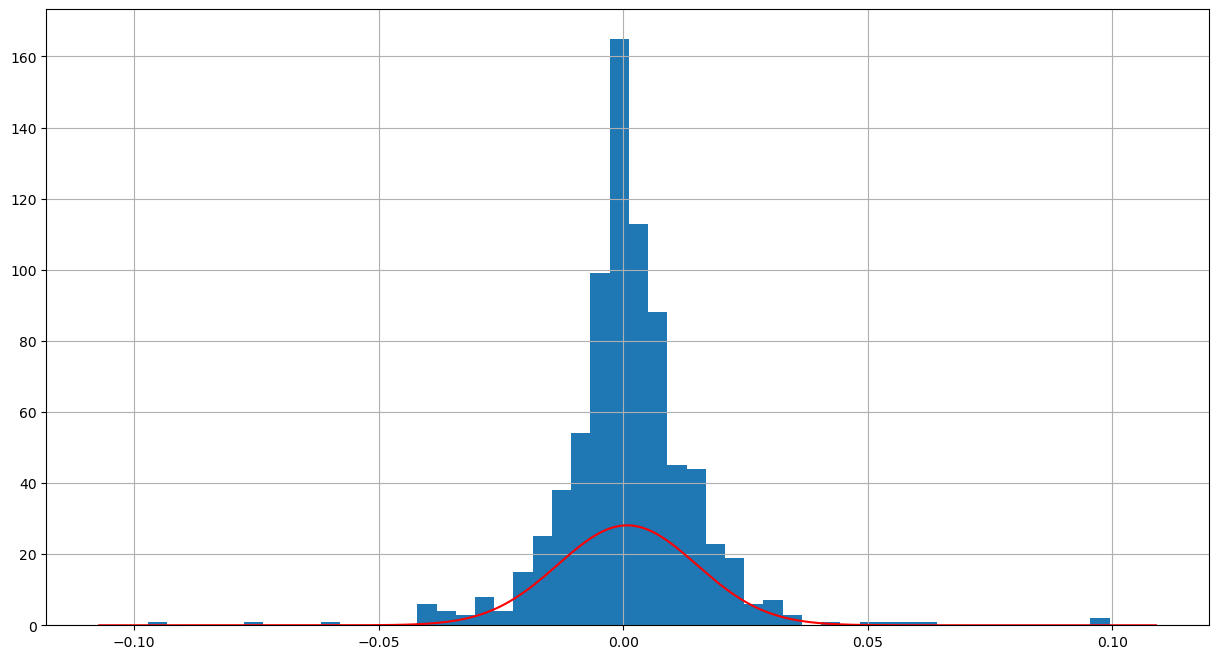

In [19]:
#plotting 
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [20]:
print("mean", mu)

mean 0.0008202314861230223


In [21]:
print('standard deviation', sigma)

standard deviation 0.014191897388737506


In [28]:
# probability that the stock price will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00017118482608677817


In [23]:
# probability that the stock price will drop over 5% in a Year
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop40 = norm.cdf(-0.4, mu220, sigma220)
print('The probability of dropping over 40% in 220 days is ', drop40)

The probability of dropping over 40% in 220 days is  0.002912363313330548


In [25]:
#Value at Risk
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.022523362407065


In [26]:
#Quantiles
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
q50 = norm.ppf(0.50, mu, sigma)
print('50% quantile ', q50)
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.008752057838414963
50% quantile  0.0008202314861230223
75% quantile  0.010392520810661006
